In [115]:
import numpy as np
import matplotlib.pyplot as plt

In [116]:
data_orig = np.genfromtxt('data/housepricedata.csv',delimiter=',',skip_header=1)
print("Dataset : \n\n"+ str(data_orig))
print("\nDimensions of dataset : "+str(data_orig.shape))

Dataset : 

[[8.450e+03 7.000e+00 5.000e+00 ... 0.000e+00 5.480e+02 1.000e+00]
 [9.600e+03 6.000e+00 8.000e+00 ... 1.000e+00 4.600e+02 1.000e+00]
 [1.125e+04 7.000e+00 5.000e+00 ... 1.000e+00 6.080e+02 1.000e+00]
 ...
 [9.042e+03 7.000e+00 9.000e+00 ... 2.000e+00 2.520e+02 1.000e+00]
 [9.717e+03 5.000e+00 6.000e+00 ... 0.000e+00 2.400e+02 0.000e+00]
 [9.937e+03 5.000e+00 6.000e+00 ... 0.000e+00 2.760e+02 0.000e+00]]

Dimensions of dataset : (1460, 11)


In [117]:
#Seed for np.random
seed=16
np.random.seed(seed)

In [118]:
#Shuffling imported original dataset
np.random.shuffle(data_orig)

In [119]:
#Shuffled dataset
print("Shuffled dataset with (Seed "+str(seed) +") :\n\n"+str(data_orig))
print("\n"+str(data_orig.shape))

Shuffled dataset with (Seed 16) :

[[2.0781e+04 7.0000e+00 7.0000e+00 ... 1.0000e+00 5.0800e+02 1.0000e+00]
 [6.2400e+03 4.0000e+00 5.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [7.5900e+03 5.0000e+00 5.0000e+00 ... 1.0000e+00 2.6400e+02 1.0000e+00]
 ...
 [6.0600e+03 4.0000e+00 5.0000e+00 ... 0.0000e+00 2.6400e+02 0.0000e+00]
 [1.1250e+04 4.0000e+00 5.0000e+00 ... 2.0000e+00 3.0400e+02 0.0000e+00]
 [4.5000e+03 5.0000e+00 5.0000e+00 ... 0.0000e+00 2.8100e+02 0.0000e+00]]

(1460, 11)


In [120]:
#Extacting Y
y_orig = data_orig[:,-1]
print("Output Y   :"+str(y_orig))
print("Shape of Y : "+str(y_orig.shape))

Output Y   :[1. 0. 1. ... 0. 0. 0.]
Shape of Y : (1460,)


In [121]:
Y = np.reshape(y_orig,(y_orig.shape[0],1)).T    
print("Shape of Y: "+ str(Y.shape))

Shape of Y: (1, 1460)


In [122]:
#Extracting vectorized input feature X (transposed)
x_shuffled = data_orig[:,0:-1].T
print("Input set : \n\n" +str(x_shuffled))

Input set : 

[[2.0781e+04 6.2400e+03 7.5900e+03 ... 6.0600e+03 1.1250e+04 4.5000e+03]
 [7.0000e+00 4.0000e+00 5.0000e+00 ... 4.0000e+00 4.0000e+00 5.0000e+00]
 [7.0000e+00 5.0000e+00 5.0000e+00 ... 5.0000e+00 5.0000e+00 5.0000e+00]
 ...
 [9.0000e+00 3.0000e+00 8.0000e+00 ... 4.0000e+00 8.0000e+00 6.0000e+00]
 [1.0000e+00 0.0000e+00 1.0000e+00 ... 0.0000e+00 2.0000e+00 0.0000e+00]
 [5.0800e+02 0.0000e+00 2.6400e+02 ... 2.6400e+02 3.0400e+02 2.8100e+02]]


In [123]:
print(x_shuffled.shape)
X=x_shuffled

(10, 1460)


In [124]:
#Splitting into Train, Test sets ( with a fixed seed )
train_split_percent = 80
test_split_percent = 20

train_X , test_X = X[:, : int( (train_split_percent/100)*X.shape[1])] , X[:,int( (train_split_percent/100)*X.shape[1]) : ]
train_Y , test_Y = Y[:, : int( (train_split_percent/100)*X.shape[1])] , Y[:,int( (train_split_percent/100)*X.shape[1]) : ]
print("Seed of Randomization   : "+str(seed))
print("\nShape of Training set X : "+str(train_X.shape))
print("Shape of Training set Y : "+str(train_Y.shape))
print("\nShape of Test set   X   : "+str(test_X.shape))
print("Shape of Test set Y     : "+str(test_Y.shape))

Seed of Randomization   : 16

Shape of Training set X : (10, 1168)
Shape of Training set Y : (1, 1168)

Shape of Test set   X   : (10, 292)
Shape of Test set Y     : (1, 292)


In [125]:
m_train = train_X.shape[1]
m_test  = test_X.shape[1]
print("No of training examples : "+str(m_train))
print("No of test example      : "+str(m_test))

No of training examples : 1168
No of test example      : 292


In [126]:
def standardize(x):
    """
    Input  :  Numpy array x 
    Output :  Numpy array of same shape as X but standardized along each rows
    
    """
    x_mean = np.mean(x,axis=1, keepdims=True)
    x_std = np.std(x, axis=1, keepdims=True)

    #print("Mean of each row : \n\n"+str(x_mean))
    #print("\nStandard deviation of each row : \n\n"+str(x_std))

    X = (x - x_mean)/x_std   #Python Broadcasting

    return X

In [127]:
train_X = standardize(train_X)
print("Standardize train_X : "+str(train_X.shape)+"\n\n"+str(train_X))
test_X  = standardize(test_X)
print("\n\nStandardize test_X : "+str(test_X.shape)+"\n\n"+str(test_X))

Standardize train_X : (10, 1168)

[[ 1.21666658 -0.48561921 -0.32757741 ...  0.30201429 18.06029334
  -0.09367555]
 [ 0.63497751 -1.51266842 -0.79678644 ... -0.79678644 -0.79678644
   1.35085948]
 [ 1.27335622 -0.50675158 -0.50675158 ...  0.38330232  0.38330232
  -0.50675158]
 ...
 [ 1.53289729 -2.18296028  0.9135877  ... -1.56365068  0.2942781
   2.15220689]
 [ 0.5981676  -0.9578675   0.5981676  ... -0.9578675   2.15420271
   0.5981676 ]
 [ 0.14991349 -2.25818307 -1.00673132 ... -0.58958073  0.24946079
   1.85643862]]


Standardize test_X : (10, 292)

[[-0.14028179 -0.11343083  0.27517571 ... -0.3467203   0.01524452
  -0.45551897]
 [-0.03367345 -0.79003084  1.47904135 ... -1.54638824 -1.54638824
  -0.79003084]
 [-0.56195197  3.18867603 -0.56195197 ... -0.56195197 -0.56195197
  -0.56195197]
 ...
 [-0.29422436 -1.49581195  0.30656944 ... -1.49581195  0.90736323
  -0.29422436]
 [-0.92523996 -0.92523996  0.60981725 ... -0.92523996  2.14487445
  -0.92523996]
 [ 0.27055568 -2.05107048  2.00

In [128]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def relu(Z):
    return np.maximum(0,Z)

def sigmoid_backward(dA, Z):
    sig = sigmoid(Z)
    return dA * sig * (1 - sig)

def relu_backward(dA, Z):
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0;
    return dZ;

In [129]:
def initialize_parameters(n_x, n_h, n_y):
    
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters 

In [130]:
def initialize_parameters_deep(layer_dims):
    parameters = {}
    L = len(layer_dims)            

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        
    return parameters

In [131]:
def linear_forward(A, W, b):
   
    Z = np.dot(W,A)+b
    cache = (A, W, b)
    
    return Z, cache

In [132]:
def linear_activation_forward(A_prev, W, b, activation):
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z), sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z), relu(Z)
    
    cache = (linear_cache, activation_cache)

    return A, cache

In [133]:
def L_model_forward(X, parameters):

    caches = []
    A = X
    L = len(parameters) // 2                
    
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters["W"+str(l)], parameters["b"+str(l)], "relu")
        caches.append(cache)
        
    AL, cache = linear_activation_forward(A, parameters["W"+str(L)], parameters["b"+str(L)],activation = "sigmoid")
    caches.append(cache)
            
    return AL, caches

In [134]:
def compute_cost(AL, Y):
    
    m = Y.shape[1]
    cost = (-1/m)*(np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL)))
    cost = np.squeeze(cost)     
   
    return cost

In [135]:
def linear_backward(dZ, cache):
    
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1/m)*np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)

    return dA_prev, dW, db

In [136]:
def linear_activation_backward(dA, cache, activation):

    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [137]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) 
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) 
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")

    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [138]:
def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) // 2 

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l + 1)]
        
    return parameters

In [139]:
layers_dims = [10,5, 1]

In [197]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.003, num_iterations = 3000, print_cost=False):#lr was 0.009

    costs = []                      
    
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):

        AL, caches = L_model_forward(X, parameters)
        
        cost = compute_cost(AL, Y)
    
        grads = L_model_backward(AL, Y, caches)
 
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per thousands)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [200]:
def evaluate(Y,Yhat,Set):
    spos=0
    
    for i in range(Y.shape[1]): 
        if Y[0,i]==1 and Yhat[0,i]==1:
            spos = spos+1
            
    p = spos /np.sum(Yhat == 1)
    r = spos/ np.sum( Y == 1)
    acc = np.mean(Y == Yhat)
    f1score = 2*p*r/(p+r)
    
    print(Set+" :       "+str(p) + "  "+str(r)+"  "+str(f1score)+"  "+str(acc))
    
    return 

Cost after iteration 0: 0.693231
Cost after iteration 100: 0.693162
Cost after iteration 200: 0.693097
Cost after iteration 300: 0.693020
Cost after iteration 400: 0.692914
Cost after iteration 500: 0.692751
Cost after iteration 600: 0.692489
Cost after iteration 700: 0.692061
Cost after iteration 800: 0.691354
Cost after iteration 900: 0.690184
Cost after iteration 1000: 0.688257
Cost after iteration 1100: 0.685091
Cost after iteration 1200: 0.679942
Cost after iteration 1300: 0.671705
Cost after iteration 1400: 0.658830
Cost after iteration 1500: 0.639416
Cost after iteration 1600: 0.611601
Cost after iteration 1700: 0.574367
Cost after iteration 1800: 0.528617
Cost after iteration 1900: 0.477738
Cost after iteration 2000: 0.427104
Cost after iteration 2100: 0.382683
Cost after iteration 2200: 0.348965
Cost after iteration 2300: 0.325834
Cost after iteration 2400: 0.308805
Cost after iteration 2500: 0.293662
Cost after iteration 2600: 0.279439
Cost after iteration 2700: 0.267376
Cost

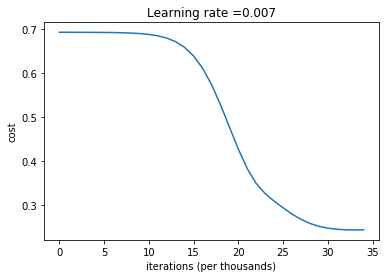

     :       	 Precision        	Recall            F-score            Accuracy
Train :       0.8762057877813505  0.9300341296928327  0.902317880794702  0.898972602739726
Test  :       0.8543046357615894  0.9084507042253521  0.8805460750853242  0.8801369863013698


In [202]:
parameters = L_layer_model(train_X, train_Y, layers_dims = [10,8,1], num_iterations = 3500, learning_rate = 0.007, print_cost = True)

def predict(X,parameters):
    
    AL = L_model_forward(X, parameters)[0]
    Y_prediction = AL
    for i in range(AL.shape[1]):
          Y_prediction[0, i] = 1 if AL[0, i] > 0.5 else 0
   
    return Y_prediction 

test_Yhat = predict(test_X,parameters)
train_Yhat = predict(train_X,parameters)


print("    "+" :       "+ "\t Precision " + "  "+ "     \tRecall" +"  "+"          F-score "+"  "+"         Accuracy")

evaluate(train_Y,train_Yhat,"Train")
evaluate(test_Y,test_Yhat,"Test ")

